## Chest X-Ray pneumonia detection

### change log
1. Three layers with higher pics resolution

### Import library
Here we import necessary libraries

In [61]:
import keras
import numpy as np

#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import glob
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os
%matplotlib inline

### Access the image files
We use the chest X ray images as the input.

In [62]:
test_path = './data/chest_xray/test/'
train_path = './data/chest_xray/train/'
label_normal = 'NORMAL/'
label_pneumonia = 'PNEUMONIA/'

### Read and explore the image files

In [63]:
suffix = '*.jpeg'
normal_train_path = train_path + label_normal + suffix
pneumonia_train_path = train_path + label_pneumonia + suffix
normal_test_path = test_path + label_normal + suffix
pneumonia_test_path = test_path + label_pneumonia + suffix
normal_train_name_list = glob.glob(normal_train_path)
pneumonia_train_name_list = glob.glob(pneumonia_train_path)
normal_test_name_list = glob.glob(normal_test_path)
pneumonia_test_name_list = glob.glob(pneumonia_test_path)

In [64]:
# Generate image array

def get_image_array(name_list):
    img_array = []
    for name in name_list:
        img = plt.imread(name)
        img_array.append(img)
    return np.array(img_array, dtype='object')

In [65]:
normal_train_img = get_image_array(normal_train_name_list)
normal_test_img = get_image_array(normal_test_name_list)
pneumonia_train_img = get_image_array(pneumonia_train_name_list)
pneumonia_test_img = get_image_array(pneumonia_test_name_list)

In [66]:
print('The normal train image size is {}'.format(normal_train_img.shape[0]))
print('The pneumonia train image size is {}'.format(pneumonia_train_img.shape[0]))
print('The normal test image size is {}'.format(normal_test_img.shape[0]))
print('The pneumonia test image size is {}'.format(pneumonia_test_img.shape[0]))

The normal train image size is 922
The pneumonia train image size is 2740
The normal test image size is 206
The pneumonia test image size is 390


### Prepare the image data
First of all we prepare the validation set in addition to train set and test set.

In [67]:
# # Create validation set
# # Concat 2 train arrays as a whole train set
# arr1 = normal_train_name_list.copy()
# arr2 = pneumonia_train_name_list.copy()
# # The complete train set
# arr1.extend(arr2)
# print('The train set contains {} chest X_Ray images'.format(len(arr1)))

# # Spin out validation set from the train set
# # 30%
# train_image_set, validation_image_set = train_test_split(arr1, test_size=0.3, shuffle=True, random_state=42)
# print('The new train set contains {} chest X_Ray images'.format(len(train_image_set)))
# print('The new validation set contains {} chest X_Ray images'.format(len(validation_image_set)))

# # print(validation_image_set)

# # Need to move validation set to validation folder
# # Cut and paste
# print('./data/chest_xray/train/NORMAL\\NORMAL-263932-0001.jpeg'.replace('train', 'validate'))

In [68]:
validate_path = './data/chest_xray/validate/'
test_path = './data/chest_xray/test/'

In [69]:
# for source in validation_image_set:
#     dest = source.replace('train', 'validate')
#     os.rename(source, dest)

normal_validate_path = validate_path + label_normal + suffix
pneumonia_validate_path = validate_path + label_pneumonia + suffix
normal_validate_name_list = glob.glob(normal_validate_path)
pneumonia_validate_name_list = glob.glob(pneumonia_validate_path)
normal_validate_img = get_image_array(normal_validate_name_list)
pneumonia_validate_img = get_image_array(pneumonia_validate_name_list)
print('The normal validate image size is {}'.format(normal_validate_img.shape[0]))
print('The pneumonia validate image size is {}'.format(pneumonia_validate_img.shape[0]))

The normal validate image size is 427
The pneumonia validate image size is 1143


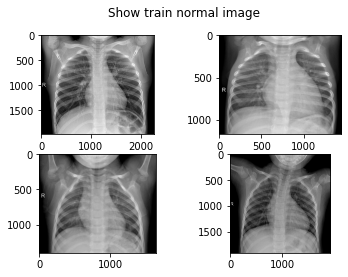

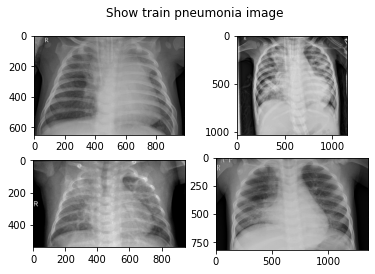

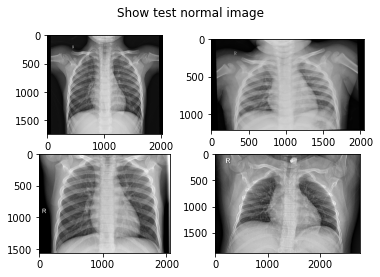

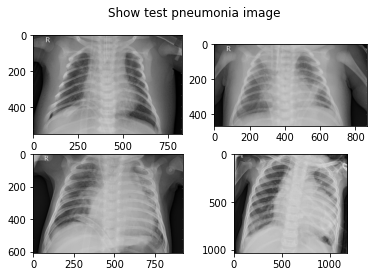

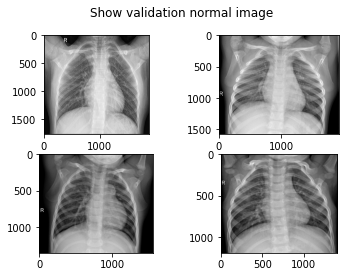

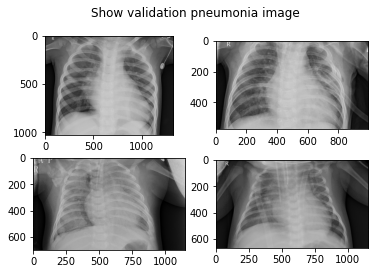

In [70]:
def show_sample_image(image_array, title):
    plt.figure()
    plt.suptitle(title)
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(image_array[random.randrange(200)], cmap='gray')

show_sample_image(normal_train_img, 'Show train normal image')
show_sample_image(pneumonia_train_img, 'Show train pneumonia image')

show_sample_image(normal_test_img, 'Show test normal image')
show_sample_image(pneumonia_test_img, 'Show test pneumonia image')

show_sample_image(normal_validate_img, 'Show validation normal image')
show_sample_image(pneumonia_validate_img, 'Show validation pneumonia image')

### Refactor the image files
Here we use Tensorflow ImageDataGenerator to refactor and resize the image files.
train_path; test_path; validate_path

In [71]:
# ImageDataGenerator for train set
IMAGE_SIZE = 128
BATCH = 32
train_img_datagen = ImageDataGenerator(rescale=1./IMAGE_SIZE,
                                       zoom_range = 0.1, 
                                       width_shift_range = 0.1,
                                       height_shift_range = 0.1
                                      )
# Load and refactor the train set images
train_source = train_img_datagen.flow_from_directory(train_path,
                                             #directory=train_path, #dataframe contains the full paths
                                                     target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                     class_mode = 'binary',
                                                     batch_size = BATCH,
                                                     seed = 42,
                                                     shuffle=False)

# ImageDataGenerator for validation set
valid_img_datagen = ImageDataGenerator(rescale=1./IMAGE_SIZE)
# Load and refactor the validation set images
validation_source = valid_img_datagen.flow_from_directory(validate_path,
                                                          target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                          class_mode = 'binary',
                                                          batch_size = BATCH,
                                                          seed = 42,
                                                          shuffle=False)

# ImageDataGenerator for test set
test_img_datagen = ImageDataGenerator(rescale=1./IMAGE_SIZE)
# Load and refactor the test set images
test_source = test_img_datagen.flow_from_directory(test_path,
                                                   target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                   class_mode = 'binary',
                                                   batch_size = BATCH,
                                                   seed = 42,
                                                   shuffle=False)
print(train_source)
print('train image shape is {}'.format(train_source.image_shape))
print(validation_source)
print('validation image shape is {}'.format(validation_source.image_shape))
print(test_source)
print('test image shape is {}'.format(test_source.image_shape))

Found 3662 images belonging to 2 classes.
Found 1570 images belonging to 2 classes.
Found 596 images belonging to 2 classes.
train image shape is (128, 128, 3)
validation image shape is (128, 128, 3)
test image shape is (128, 128, 3)


### Prepare the model
Here we prepare the CNN model.

In [72]:
# #Input shape = [width, height, color channels]
# inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# # Block One
# x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPool2D()(x)
# x = layers.Dropout(0.2)(x)

# # Block Two
# x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPool2D()(x)
# x = layers.Dropout(0.2)(x)

# # Block Three
# x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
# x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
# x = layers.BatchNormalization()(x)
# x = layers.Activation('relu')(x)
# x = layers.MaxPool2D()(x)
# x = layers.Dropout(0.4)(x)

# # Head
# #x = layers.BatchNormalization()(x)
# x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu')(x)
# x = layers.Dropout(0.5)(x)

# #Final Layer (Output)
# output = layers.Dense(1, activation='sigmoid')(x)

# model = keras.Model(inputs=[inputs], outputs=output)

In [73]:
# CNN using Keras' Sequential capabilities
model = Sequential()

# The first layer
# 5x5 convolution with 1x1 stride and 16 filters and no padding.
model.add(Conv2D(16, (5,5), strides = (1,1), padding='valid',
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Activation('relu'))

# The second layer
# Another 5x5 convolution with 2x2 stride, 32 filters and no padding.
model.add(Conv2D(32, (5,5), strides = (2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Activation('relu'))

# Thr third layer
# The 3rd 5x5 convolution with 2x2 stride, 64 filters and no padding.
model.add(Conv2D(64, (5,5), strides = (2,2), padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))

## 2x2 max pooling reduces to 4 x 4 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

## Flatten turns 4 x 4 x 64 into 1024x1
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
# We start with the learning rate 0.000003
model.compile(loss='binary_crossentropy',optimizer = Adam(learning_rate=0.000003), metrics='binary_accuracy')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
batch_normalization_12 (Batc (None, 124, 124, 16)      64        
_________________________________________________________________
dropout_15 (Dropout)         (None, 124, 124, 16)      0         
_________________________________________________________________
activation_15 (Activation)   (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 32)        12832     
_________________________________________________________________
batch_normalization_13 (Batc (None, 60, 60, 32)        128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 60, 60, 32)       

### Fit the model

In [74]:
# Fit the model with 300 epoches
history = model.fit(train_source,
                    epochs = 200,
                    validation_data=validation_source,
                    steps_per_epoch=(len(train_source.filenames)/32),
                    validation_steps=(len(validation_source.filenames)/32))

Epoch 1/200
114/114 [==============================] - 121s 1s/step - loss: 1.3931 - binary_accuracy: 0.3695 - val_loss: 0.7394 - val_binary_accuracy: 0.2720
Epoch 2/200
114/114 [==============================] - 116s 1s/step - loss: 1.1305 - binary_accuracy: 0.4470 - val_loss: 0.6152 - val_binary_accuracy: 0.7280
Epoch 3/200
114/114 [==============================] - 124s 1s/step - loss: 0.9616 - binary_accuracy: 0.5000 - val_loss: 0.5649 - val_binary_accuracy: 0.7280
Epoch 4/200
114/114 [==============================] - 118s 1s/step - loss: 0.8368 - binary_accuracy: 0.5609 - val_loss: 0.5670 - val_binary_accuracy: 0.7274
Epoch 5/200
114/114 [==============================] - 115s 1s/step - loss: 0.8034 - binary_accuracy: 0.5969 - val_loss: 0.5828 - val_binary_accuracy: 0.7280
Epoch 6/200
114/114 [==============================] - 116s 1s/step - loss: 0.7410 - binary_accuracy: 0.6393 - val_loss: 0.5938 - val_binary_accuracy: 0.7280
Epoch 7/200
114/114 [==============================]

114/114 [==============================] - 114s 993ms/step - loss: 0.2826 - binary_accuracy: 0.8839 - val_loss: 0.2313 - val_binary_accuracy: 0.9350
Epoch 104/200
114/114 [==============================] - 114s 1000ms/step - loss: 0.2836 - binary_accuracy: 0.8859 - val_loss: 0.2302 - val_binary_accuracy: 0.9357
Epoch 105/200
114/114 [==============================] - 115s 1s/step - loss: 0.2716 - binary_accuracy: 0.8889 - val_loss: 0.2328 - val_binary_accuracy: 0.9338
Epoch 106/200
114/114 [==============================] - 115s 1s/step - loss: 0.2753 - binary_accuracy: 0.8889 - val_loss: 0.2310 - val_binary_accuracy: 0.9318
Epoch 107/200
114/114 [==============================] - 116s 1s/step - loss: 0.2665 - binary_accuracy: 0.8910 - val_loss: 0.2324 - val_binary_accuracy: 0.9293
Epoch 108/200
114/114 [==============================] - 114s 996ms/step - loss: 0.2662 - binary_accuracy: 0.8910 - val_loss: 0.2300 - val_binary_accuracy: 0.9293
Epoch 109/200
114/114 [=====================

Epoch 154/200
114/114 [==============================] - 114s 1s/step - loss: 0.1888 - binary_accuracy: 0.9241 - val_loss: 0.2227 - val_binary_accuracy: 0.9159
Epoch 155/200
114/114 [==============================] - 114s 996ms/step - loss: 0.2083 - binary_accuracy: 0.9181 - val_loss: 0.2268 - val_binary_accuracy: 0.9146
Epoch 156/200
114/114 [==============================] - 114s 998ms/step - loss: 0.1977 - binary_accuracy: 0.9167 - val_loss: 0.2417 - val_binary_accuracy: 0.9045
Epoch 157/200
114/114 [==============================] - 116s 1s/step - loss: 0.1915 - binary_accuracy: 0.9208 - val_loss: 0.2456 - val_binary_accuracy: 0.9057
Epoch 158/200
114/114 [==============================] - 115s 998ms/step - loss: 0.1997 - binary_accuracy: 0.9200 - val_loss: 0.2365 - val_binary_accuracy: 0.9089
Epoch 159/200
114/114 [==============================] - 114s 997ms/step - loss: 0.1971 - binary_accuracy: 0.9216 - val_loss: 0.2362 - val_binary_accuracy: 0.9083
Epoch 160/200
114/114 [=====

In [75]:
# Evaluate the validation set scores.
score = model.evaluate(validation_source, steps = len(validation_source.filenames)/32, verbose = 0)
print('Val loss of validation set: {}'.format(score[0]),)
print('Val accuracy of validation set: {}'.format(score[1]))

Val loss of validation set: 0.2657388746738434
Val accuracy of validation set: 0.884713351726532


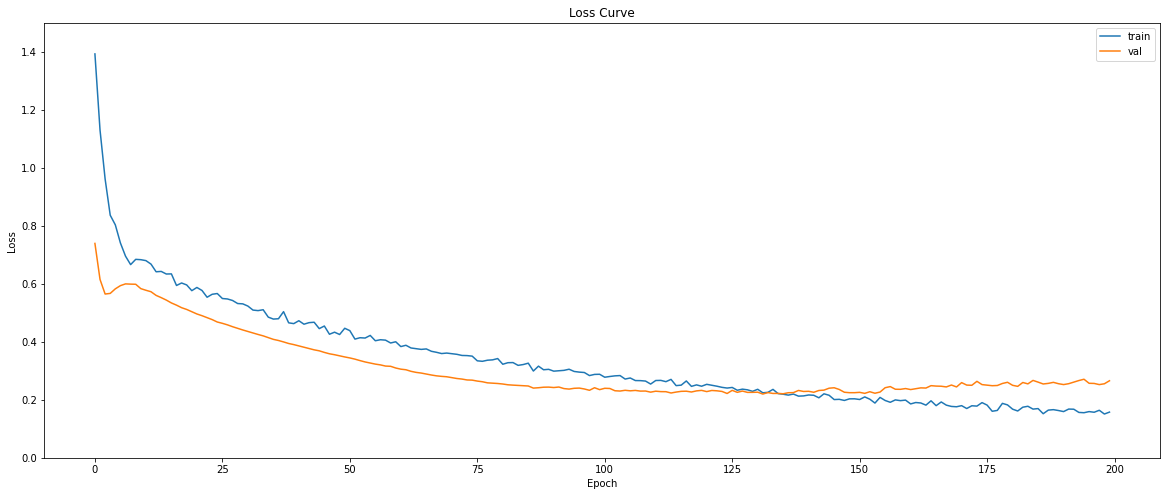

In [76]:
# Compare the train set loss with validation set loss.
fig, ax = plt.subplots(figsize=(20,8))

plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

ax.set_title('Loss Curve')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 1.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

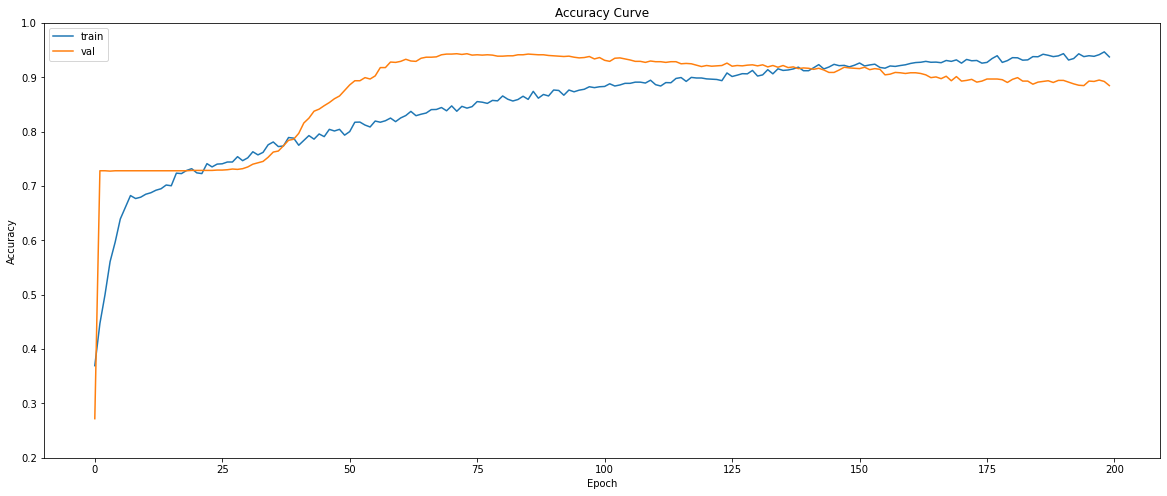

In [77]:
# Compare the train set accuracy with validation set accuracy.

fig, ax = plt.subplots(figsize=(20,8))
plt.plot(history.epoch, history.history['binary_accuracy'])
plt.plot(history.epoch, history.history['val_binary_accuracy'])
ax.set_title('Accuracy Curve')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.20, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [78]:
# Evaluate the test set scores.
score = model.evaluate(test_source, steps = len(test_source.filenames)/32, verbose = 0)
print('Val loss of test set: {}'.format(score[0]),)
print('Val accuracy of test set: {}'.format(score[1]))

Val loss of test set: 0.2898012697696686
Val accuracy of test set: 0.8674496412277222


In [79]:
# Save the model
model.save('./data/pneumonia_model_copy3_4_stable.h5')
print('model saved...')

model saved...


### Predict

In [80]:
# Predict each of the test images.
# Do not assign steps and batch_size parameters since using data generators.
prediction = model.predict(test_source, verbose=0)

# The true label values are between -1 and 1 due to sigmoid activation.
# Therefore by default we define label value > 0.5 as the possible penumonia image.
prediction_labels= np.where(prediction > 0.5, 1, 0)

### Evaluate the prediction

In [81]:
# Score the accuracy
# Manage the Y labels based on the filename.
true_labels = np.arange(len(test_source.filenames))
for idx, name in enumerate(test_source.filenames):
    if(name.find('NORMAL')!=-1):
        true_labels[idx] = 0
    else:
        true_labels[idx] = 1       

(596, 1)
0.8674496644295302


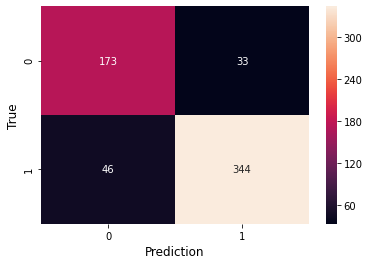

In [82]:
# Check the accuracy with heatmap
print(prediction_labels.shape)
print(accuracy_score(true_labels, prediction_labels))
confusion_matrix = confusion_matrix(true_labels, prediction_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Prediction", fontsize= 12)
plt.ylabel("True", fontsize= 12)
plt.show()

In [83]:
# Check the report.
print('                 ====The classification report====')
print(classification_report(true_labels, prediction_labels, labels = [0, 1]))

                 ====The classification report====
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       206
           1       0.91      0.88      0.90       390

    accuracy                           0.87       596
   macro avg       0.85      0.86      0.86       596
weighted avg       0.87      0.87      0.87       596

